<a href="https://colab.research.google.com/github/akshshu/GoodPatchFalseNegativeCheck/blob/master/abc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-explain

     |████████████████████████████████| 43 kB 1.4 MB/s 


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
# %matplotlib inline

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [4]:
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)

91897856/91884032 [==============================] - 1s 0us/step
<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f1105bb7c10>>


In [6]:
import requests
dDir="/content/gdrive/MyDrive/tractors/"
import os

In [25]:
Pred2=[]
Freq=[]
for i in range(82):
  Freq.append(i)

In [26]:
for im_path in os.listdir(dDir):
  IMAGE_PATH= os.path.join(dDir,im_path)
  img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)
  #view the image
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}
  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  Pred2.append(decode_predictions(predictions,top=5)[0][0][2])



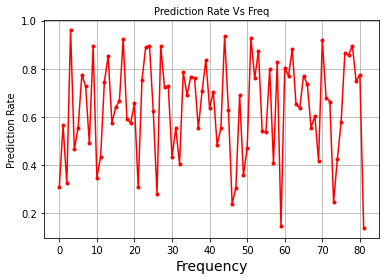

In [27]:
import matplotlib.pyplot as plt

  
plt.plot(Freq,Pred2, color='red', marker='.')
plt.title('Prediction Rate Vs Freq', fontsize=10)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Prediction Rate', fontsize=10)
plt.grid(True)
plt.show()

In [28]:
dDir2="/content/gdrive/MyDrive/patch_trac/"
Pred = []

In [29]:
for im_path in os.listdir(dDir2):
  IMAGE_PATH= os.path.join(dDir2,im_path)
  img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)
  #view the image
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}
  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  Pred.append(decode_predictions(predictions,top=5)[0][0][2])
  # print(decode_predictions(predictions,top=5)[0][0][2])


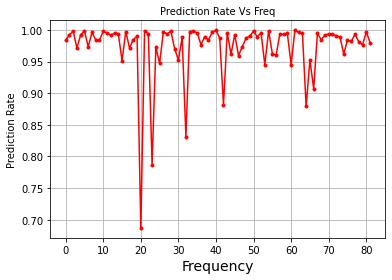

In [30]:

plt.plot(Freq,Pred, color='red', marker='.')
plt.title('Prediction Rate Vs Freq', fontsize=10)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Prediction Rate', fontsize=10)
plt.grid(True)
plt.show()